In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
from IPython.display import clear_output
from multiprocessing import Pool
from time import time
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/beijing-18/processed/final_data_mar.csv.gz')
data = pd.get_dummies(data, columns=['weather', 'wind_direction'])
display(data.head(2), data.tail(2))

,time,station_id,longitude,latitude,PM25_Concentration,temperature,humidity,wind_speed,filled,weather_0.0,...,wind_direction_0.0,wind_direction_1.0,wind_direction_2.0,wind_direction_3.0,wind_direction_4.0,wind_direction_9.0,wind_direction_13.0,wind_direction_14.0,wind_direction_23.0,wind_direction_24.0
0,2014-05-01 00:00:00,1001,116.173553,40.090679,138.0,20.0,56.0,7.92,False,1,...,0,0,0,0,0,0,1,0,0,0
1,2014-05-01 01:00:00,1001,116.173553,40.090679,124.0,18.0,64.0,7.56,False,1,...,0,0,0,0,0,0,1,0,0,0


,time,station_id,longitude,latitude,PM25_Concentration,temperature,humidity,wind_speed,filled,weather_0.0,...,wind_direction_0.0,wind_direction_1.0,wind_direction_2.0,wind_direction_3.0,wind_direction_4.0,wind_direction_9.0,wind_direction_13.0,wind_direction_14.0,wind_direction_23.0,wind_direction_24.0
271558,2015-04-30 22:00:00,1036,116.0,39.579999,88.0,24.4,47.0,2.7,False,0,...,0,0,0,0,0,0,0,0,1,0
271559,2015-04-30 23:00:00,1036,116.0,39.579999,88.0,19.8,72.0,2.6,True,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
all_stations = data.station_id.unique()
all_stations

array([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012,
       1014, 1016, 1017, 1018, 1019, 1022, 1023, 1024, 1025, 1026, 1027,
       1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036])

In [4]:
splitter = KFold(n_splits=3, shuffle=True, random_state=1234)

for f_i, (train, test) in enumerate(splitter.split(all_stations)):
    train_stations = all_stations[train]
    test_stations = all_stations[test]
    train_data = data[data.station_id.isin(train_stations)]
    test_data = data[data.station_id.isin(test_stations)]
    
    train_data.to_csv('../data/beijing-18/processed/fold_'+str(f_i)+'_train_mar.csv.gz', index=None)
    test_data.to_csv('../data/beijing-18/processed/fold_'+str(f_i)+'_test_mar.csv.gz', index=None)

### Visualize

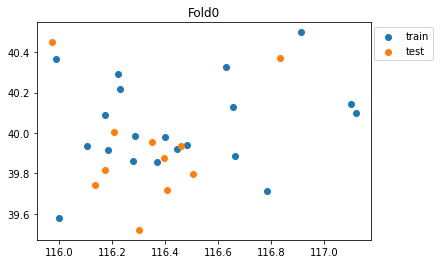

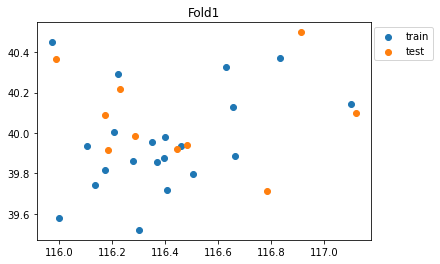

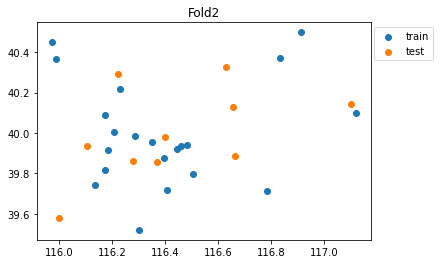

In [5]:
for f_i, (train, test) in enumerate(splitter.split(all_stations)):
    train_stations = all_stations[train]
    test_stations = all_stations[test]
    tmp_trn_df = data[data.station_id.isin(train_stations)].drop_duplicates('station_id')
    tmp_tst_df = data[data.station_id.isin(test_stations)].drop_duplicates('station_id')
    plt.figure()
    plt.title('Fold'+str(f_i))
    plt.scatter(tmp_trn_df['longitude'], tmp_trn_df['latitude'], label='train')
    plt.scatter(tmp_tst_df['longitude'], tmp_tst_df['latitude'], label='test')
    plt.legend(bbox_to_anchor=(1.2,1))